In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df = df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'OverallQual', 'SalePrice']]
df.head()

,GrLivArea,BedroomAbvGr,FullBath,OverallQual,SalePrice
0,1710,3,2,7,208500
1,1262,3,2,6,181500
2,1786,3,2,7,223500
3,1717,3,1,7,140000
4,2198,4,2,8,250000


In [8]:
df.isnull().sum()

GrLivArea       0
BedroomAbvGr    0
FullBath        0
OverallQual     0
SalePrice       0
dtype: int64

In [9]:
X = df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'OverallQual']]
y = df['SalePrice']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.7610284025418284


In [15]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1832990106.7567859


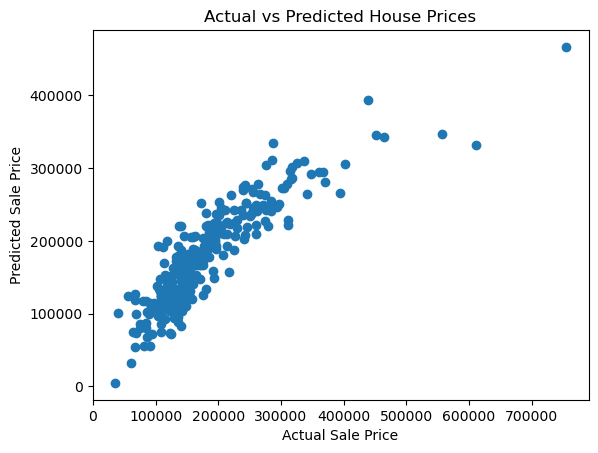

In [16]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [17]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coefficients

,Feature,Coefficient
0,GrLivArea,61.849368
1,BedroomAbvGr,-11386.255235
2,FullBath,7357.706975
3,OverallQual,29539.295731


In [18]:
new_house = pd.DataFrame(
    [[2000, 3, 2, 2]],
    columns=['GrLivArea', 'BedroomAbvGr', 'FullBath', 'OverallQual']
)

price = model.predict(new_house)[0]
print(f"Predicted House Price: ${price:,.2f}")


Predicted House Price: $90,787.12


In [17]:
new_house = pd.DataFrame(
    [[1000, 2, 1, 5]],
    columns=['GrLivArea', 'BedroomAbvGr', 'FullBath', 'OverallQual']
)

price = model.predict(new_house)[0]
print(f"Predicted House Price: ${price:,.2f}")


Predicted House Price: $121,584.19


In [19]:
new_house = pd.DataFrame(
    [[1800, 3, 2, 6]],
    columns=['GrLivArea', 'BedroomAbvGr', 'FullBath', 'OverallQual']
)

price = model.predict(new_house)[0]
print(f"Predicted House Price: ${price:,.2f}")


Predicted House Price: $196,574.43


In [21]:
price = model.predict(new_house)[0]

somalia_factor = 0.6   # 60% of original price
adjusted_price = price * somalia_factor

print(f"Predicted House Price (Somalia): ${adjusted_price:,.2f}")


Predicted House Price (Somalia): $117,944.66


In [22]:
def predict_house_somalia(area, bedrooms, bathrooms, quality):
    new_house = pd.DataFrame(
        [[area, bedrooms, bathrooms, quality]],
        columns=['GrLivArea', 'BedroomAbvGr', 'FullBath', 'OverallQual']
    )
    base_price = model.predict(new_house)[0]
    somalia_price = base_price * 0.6
    return somalia_price


In [23]:
price = predict_house_somalia(2000, 3, 2, 7)
print(f"Predicted House Price (Somalia): ${price:,.2f}")


Predicted House Price (Somalia): $143,090.16


In [ ]:
new_house = pd.DataFrame(
    [[AREA, BEDROOMS, BATHROOMS, QUALITY]],
    columns=['GrLivArea', 'BedroomAbvGr', 'FullBath', 'OverallQual']
)

price = model.predict(new_house)[0]
print(f"Predicted House Price: ${price:,.2f}")


In [21]:
new_house = pd.DataFrame(
    [[1800, 3, 2, 4]],
    columns=['GrLivArea', 'BedroomAbvGr', 'FullBath', 'OverallQual']
)

price = model.predict(new_house)[0]
print(f"Predicted House Price: ${price:,.2f}")

Predicted House Price: $137,495.84
